# Importing Needed Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Reading Data

In [2]:
# Load CSV using Pandas from URL
import pandas
url = "https://raw.githubusercontent.com/user1019/database/master/Regression-Data.tsv"
df = pandas.read_csv(url,  sep='\t')
print(df.shape)
df.head(5)

(21349, 3)


,Gene_Profile_Size,Taxon_Profile_Size,Semantic_similarity
0,15,22,0.096137
1,15,162,0.329889
2,15,157,0.329889
3,15,1029,0.379192
4,15,34,0.065285


# Data Exploration

Lets first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

,Gene_Profile_Size,Taxon_Profile_Size,Semantic_similarity
count,21349.000000,21349.000000,21349.000000
mean,25.517073,86.331163,0.400730
std,18.741270,179.789270,0.332214
min,3.000000,2.000000,0.000000
25%,11.000000,11.000000,0.103883
50%,23.000000,31.000000,0.361598
75%,32.000000,86.000000,0.602077
max,83.000000,2829.000000,4.853451


Lets select some features to explore more.

In [4]:
cdf = df[['Gene_Profile_Size','Taxon_Profile_Size','Semantic_similarity']]
cdf.head(9)

,Gene_Profile_Size,Taxon_Profile_Size,Semantic_similarity
0,15,22,0.096137
1,15,162,0.329889
2,15,157,0.329889
3,15,1029,0.379192
4,15,34,0.065285
5,15,20,0.065285
6,15,275,0.424140
7,15,27,0.260138
8,15,18,0.034433


# Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.
This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Train data distribution


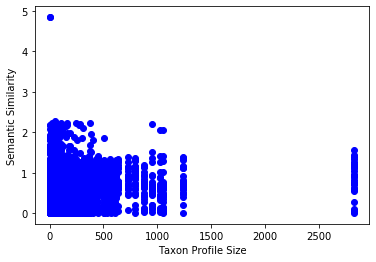

In [6]:
plt.scatter(train.Taxon_Profile_Size, train.Semantic_similarity,  color='blue')
plt.xlabel("Taxon Profile Size")
plt.ylabel("Semantic Similarity")
plt.show()

# Multiple Regression Model


In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Gene_Profile_Size','Taxon_Profile_Size']])
y = np.asanyarray(train[['Semantic_similarity']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.00694606 0.0005259 ]]


# Prediction

In [8]:
y_hat= regr.predict(test[['Gene_Profile_Size','Taxon_Profile_Size']])
x = np.asanyarray(test[['Gene_Profile_Size','Taxon_Profile_Size']])
y = np.asanyarray(test[['Semantic_similarity']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.09
Variance score: 0.20


In [9]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y) )

R2-score: -2.56


# Residual Plot


Text(0, 0.5, 'Residual')

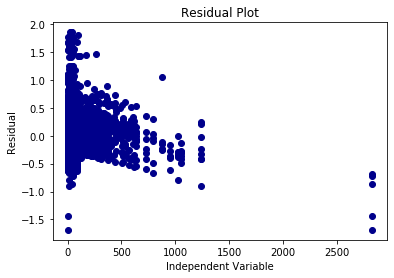

In [10]:
residuals = y-y_hat
plt.plot(x,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")    